In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading the iris data set

In [2]:
# Loading the data set

a = list(pd.read_csv('data/a_all.data', names = ['data1'])['data1'])
b = list(pd.read_csv('data/b_all.data', names = ['data1'])['data1'])
c = list(pd.read_csv('data/c_all.data', names = ['data1'])['data1'])
d = list(pd.read_csv('data/d_all.data', names = ['data1'])['data1'])
y = list(pd.read_csv('data/iris.data', names = ['data1'])['data1'])

# Organising the data set according to the irises

a_set = a[0:50]
b_set = b[0:50]
c_set = c[0:50]
d_set = d[0:50]
y_set = y[0:50]

a_ver = a[50:100]
b_ver = b[50:100]
c_ver = c[50:100]
d_ver = d[50:100]
y_ver = y[50:100]

a_vir = a[100:]
b_vir = b[100:]
c_vir = c[100:]
d_vir = d[100:]
y_vir = y[100:]

In [102]:
# Changing the values in to numerical labels

y_num_set = list(np.zeros(50).astype(np.int))
y_num_ver = list(np.ones(50).astype(np.int))
y_num_vir = list((np.ones(50)*2).astype(np.int))

y_num = y_num_set + y_num_ver + y_num_vir

## Creating the multiclass perceptron model
### Creating the value and target arrays

In [122]:
# Creating arrays from the target and value lists

x = np.array([a, b, c, d]).T
y = y_num

### Creating the weight matrix

In [87]:
# Creating random weight and bias matrix

weights = np.random.rand(4,3)
bias = np.random.rand(1,3)[0]

# Creating not random weight and bias matrix 

#w_b_matrix = []

#for i in range(0,len(x[0])):
#    w_b_matrix.append([0.1, 0.1, 0.1, 0.1, 0.1,])

### Creating the functions

In [91]:
# Calculating the simple perceptron
# M*v multiplicaiton of the target and weight arrays
# Adding the bias to these values

def model(x, weights, bias):
    result = np.dot(x, weights) + bias
    return result

In [136]:
# Setting the learning rate - the regularisation parameter

lam = 10**-5

# Multi-class perceptron regularisation

def multiclass_perceptron(x, y, w, b):        
    
    #getting the results of the perceptron
    all_evals = model(x, w, b)

    #initialising the cost value
    cost = 0
    
    #iterating through the data
    for i in range(0,len(y)):

        # update cost summand
        cost +=  np.max(all_evals[i]) - all_evals[i, y[i]]
        
    # return cost with regularizer added
    cost += lam*np.linalg.norm(w,'fro')**2
    return cost/float(len(y))

In [137]:
weights

array([[0.24490115, 0.49124166, 0.79377822],
       [0.59859827, 0.27633356, 0.9236094 ],
       [0.15817605, 0.60322962, 0.7262142 ],
       [0.809738  , 0.60781934, 0.71254277]])

In [138]:
cost = multiclass_perceptron(x, y, weights, bias)

new_weights = weights / cost
new_bias = bias/cost

In [146]:
(np.dot(x[0], weights) + bias ) / cost

array([1.36756085, 1.77043346, 3.0344571 ])

## Creting the binary classification perceptron model

In [ ]:
#transforming the x values

X = np.array([np.array(X_dataset['data1']), np.array(X_dataset['data2']), np.array(X_dataset['data3']), np.array(X_dataset['data4'])]).T

#transforming the y values

y_temp = np.array(X_dataset['type'])

y = []

for i in range(0,len(y_temp)):
    if y_temp[i] == 'Iris-setosa':
        y.append(-1)
    elif y_temp[i] == 'Iris-virginica':
        y.append(1)
        
#creating test and train datasets

X_train = X[::2]
X_test = X[1::2]

y_train = y[::2]
y_test = y[1::2]

In [4]:
#loading the iris matrix and the dataset

X_dataset = pd.read_csv('data_old/iris_modif.data', names = ['data1', 'data2', 'data3', 'data4', 'type'])
y = pd.read_csv('data_old/y.data')

#cehcking the iris matrix

X_dataset.tail()

FileNotFoundError: [Errno 2] File b'data_old/iris_modif.data' does not exist: b'data_old/iris_modif.data'

In [88]:
#defining the prediction function

def predict(X_vector, m_w):
    
    probability = m_w[0]
    
    for i in range(0, len(X_vector)):
        probability += X_vector[i]*m_w[i+1]
        
    if probability > 0:
        return 1
    else:
        return -1

In [92]:
#defining the fit function which modifies the weights

def fit(X, y, epochs, eta):
    
    m_w = [0, 0, 0, 0, 0]
    
    #iterating through each epoch
    for i in range(0,epochs):
        for j in range(0,len(X)):
            
            update = eta * (y[j] - predict(X[j], m_w))
            
            for w in range(1,len(m_w)):
                m_w[w] += update * X[j][w-1]
            
            m_w[0] += update
            
    return m_w

In [93]:
#calling the prediction function and plotting the results

def pred_plot(X_test, weights):

    predictions = []

    for i in range(0,len(X_test)):
        predictions.append(predict(X_test[i], weights))
        
    acc = accuracy_score(y_test, predictions)

    print('The accuracy of the prediction is: ', acc)

In [94]:
#setting the variables

epochs = 1
eta = 0.01

#calculating the weights

weights = fit(X_train, y_train, epochs, eta)

#predicting the dataset

pred_plot(X_test, weights)

The accuracy of the prediction is:  0.5


In [40]:
a = list(pd.read_csv('data/a_all.data', names = ['data1'])['data1'])
b = list(pd.read_csv('data/b_all.data', names = ['data1'])['data1'])
c = list(pd.read_csv('data/c_all.data', names = ['data1'])['data1'])
d = list(pd.read_csv('data/d_all.data', names = ['data1'])['data1'])
y = list(pd.read_csv('data/iris.data', names = ['data1'])['data1'])

a_set = a[0:50]
b_set = b[0:50]
c_set = c[0:50]
d_set = d[0:50]

a_ver = a[50:100]
b_ver = b[50:100]
c_ver = c[50:100]
d_ver = d[50:100]

a_vir = a[100:]
b_vir = b[100:]
c_vir = c[100:]
d_vir = d[100:]

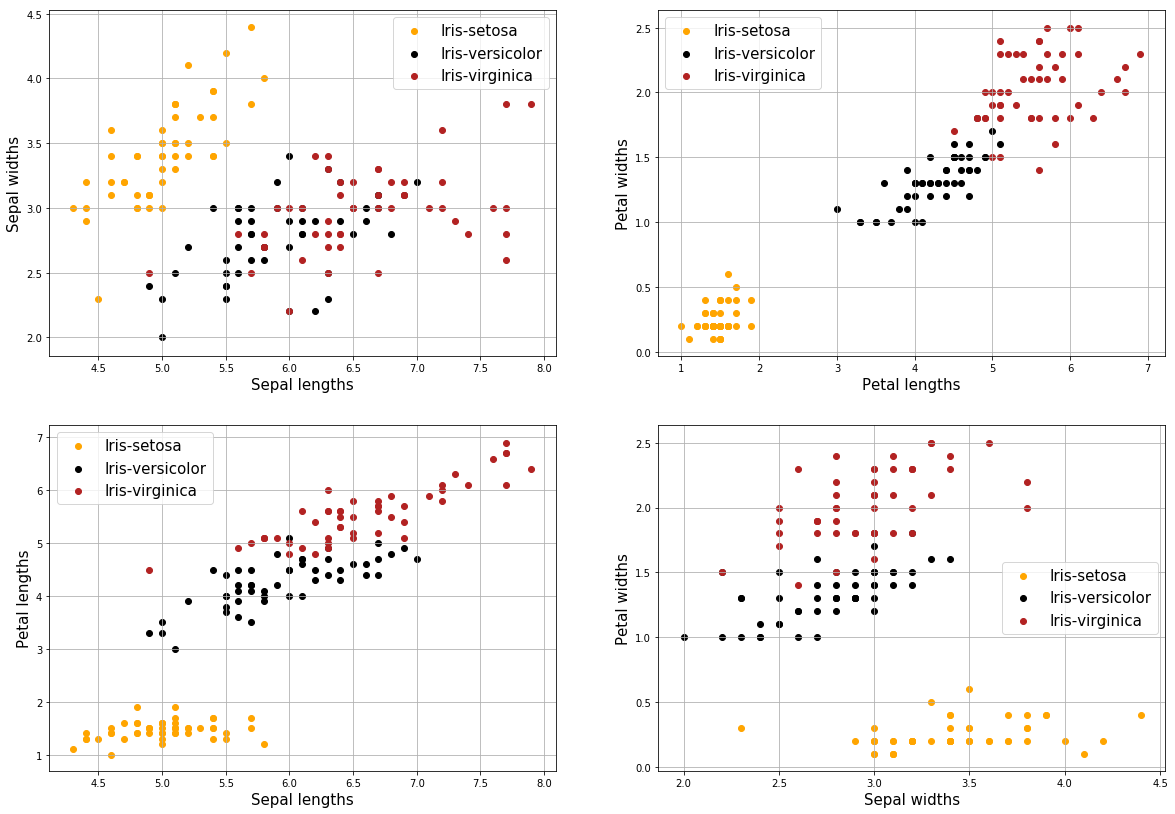

In [44]:
fig, axs = plt.subplots(2, 2, figsize = (20,14))

axs[0, 0].scatter(a_set, b_set, c='orange', label = 'Iris-setosa')
axs[0, 0].scatter(a_ver, b_ver, c='black', label = 'Iris-versicolor')
axs[0, 0].scatter(a_vir, b_vir, c='firebrick', label = 'Iris-virginica')
axs[0, 0].set_xlabel('Sepal lengths', fontsize = 15)
axs[0, 0].set_ylabel('Sepal widths', fontsize = 15)
axs[0, 0].grid()
axs[0, 0].legend(fontsize = 15)

axs[0, 1].scatter(c_set, d_set, c='orange', label = 'Iris-setosa')
axs[0, 1].scatter(c_ver, d_ver, c='black', label = 'Iris-versicolor')
axs[0, 1].scatter(c_vir, d_vir, c='firebrick', label = 'Iris-virginica')
axs[0, 1].set_xlabel('Petal lengths', fontsize = 15)
axs[0, 1].set_ylabel('Petal widths', fontsize = 15)
axs[0, 1].grid()
axs[0, 1].legend(fontsize = 15)

axs[1, 0].scatter(a_set, c_set, c='orange', label = 'Iris-setosa')
axs[1, 0].scatter(a_ver, c_ver, c='black', label = 'Iris-versicolor')
axs[1, 0].scatter(a_vir, c_vir, c='firebrick', label = 'Iris-virginica')
axs[1, 0].set_xlabel('Sepal lengths', fontsize = 15)
axs[1, 0].set_ylabel('Petal lengths', fontsize = 15)
axs[1, 0].grid()
axs[1, 0].legend(fontsize = 15)

axs[1, 1].scatter(b_set, d_set, c='orange', label = 'Iris-setosa')
axs[1, 1].scatter(b_ver, d_ver, c='black', label = 'Iris-versicolor')
axs[1, 1].scatter(b_vir, d_vir, c='firebrick', label = 'Iris-virginica')
axs[1, 1].set_xlabel('Sepal widths', fontsize = 15)
axs[1, 1].set_ylabel('Petal widths', fontsize = 15)
axs[1, 1].grid()
axs[1, 1].legend(fontsize = 15)

plt.savefig('different_iris_prop_scatter.PNG', dpi = 600)

plt.show()

## Plotting the accuracy vector

In [31]:
#reading in the accuracy vector

accuracy1 = list(pd.read_csv('accuracy_vector.txt', names = ['data1'])['data1'])
accuracy2 = list(pd.read_csv('accuracy_vector2.txt', names = ['data1'])['data1'])
accuracy3 = list(pd.read_csv('accuracy_vector3.txt', names = ['data1'])['data1'])
accuracy4 = list(pd.read_csv('accuracy_vector4.txt', names = ['data1'])['data1'])
accuracy5 = list(pd.read_csv('accuracy_vector5.txt', names = ['data1'])['data1'])
accuracy6 = list(pd.read_csv('accuracy_vector6.txt', names = ['data1'])['data1'])

accuracy_mean = (np.array(accuracy1) + np.array(accuracy2) + np.array(accuracy3) + np.array(accuracy4) + np.array(accuracy5) + np.array(accuracy6))/6

epochs = list(range(0,len(accuracy)))

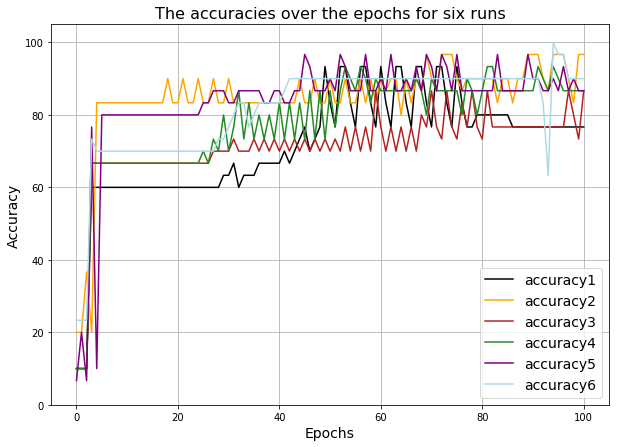

In [45]:
#plotting the accuracy vector

plt.figure(figsize=(10,7))

plt.plot(epochs, accuracy1, color = 'black', label = 'accuracy1')
plt.plot(epochs, accuracy2, color = 'orange', label = 'accuracy2')
plt.plot(epochs, accuracy3, color = 'firebrick', label = 'accuracy3')
plt.plot(epochs, accuracy4, color = 'forestgreen', label = 'accuracy4')
plt.plot(epochs, accuracy5, color = 'purple', label = 'accuracy5')
plt.plot(epochs, accuracy6, color = 'lightblue', label = 'accuracy6')

plt.ylim(0,105)

plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('The accuracies over the epochs for six runs', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()

plt.savefig('diff_acc.PNG', dpi = 600)

plt.show()

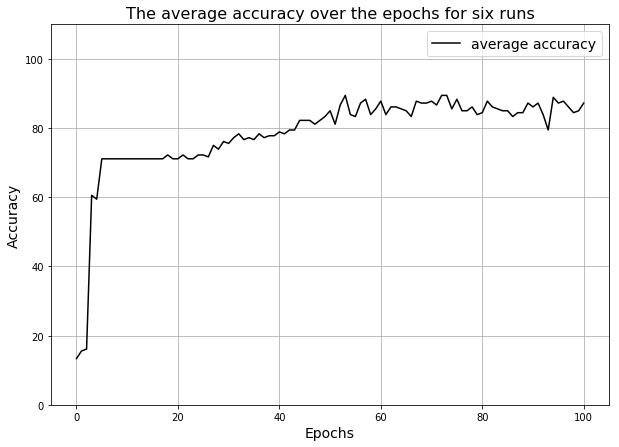

In [46]:
#plotting the accuracy vector

plt.figure(figsize=(10,7))

plt.plot(epochs, accuracy_mean, color = 'black', label = 'average accuracy')

plt.ylim(0,110)

plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('The average accuracy over the epochs for six runs', fontsize = 16)
plt.legend(fontsize = 14)
plt.grid()

plt.savefig('avg_acc.PNG', dpi = 600)

plt.show()

## Creating heatmap 